# CYCLEGAN

In [14]:
import os
import matplotlib.pyplot as plt

from data import DIV2K
from model.cyclegan import HR_generator, LR_generator, discriminator
from train import CycleganTrainer

%matplotlib inline

In [15]:
# Location of model weights (needed for demo)
weights_dir = 'weights/cyclegan_6'
weights_file = os.path.join(weights_dir, 'weights.h5')

os.makedirs(weights_dir, exist_ok=True)

## Datasets

You don't need to download the DIV2K dataset as the required parts are automatically downloaded by the `DIV2K` class. By default, DIV2K images are stored in folder `.div2k` in the project's root directory.

In [16]:
div2k_train = DIV2K(scale=4, subset='train', downgrade='bicubic')
div2k_valid = DIV2K(scale=4, subset='valid', downgrade='bicubic')

In [17]:
train_ds = div2k_train.dataset(batch_size=16, random_transform=True)
valid_ds = div2k_valid.dataset(batch_size=16, random_transform=True, repeat_count=1)

## Training

In [18]:
CG_trainer = CycleganTrainer(HR_generator(scale=4), LR_generator(), discriminator(), checkpoint_dir='./.ckpt/cyclegan_6')

In [ ]:
CG_trainer.model.summary()

In [21]:
CG_trainer.train(train_ds,
                  valid_ds.take(10),
                  steps=300000, 
                  evaluate_every=1000)

2000/300000, PSNR = 26.609972 (88.86s)
3000/300000, PSNR = 25.579456 (324.72s)
4000/300000, PSNR = 27.832428 (334.97s)


KeyboardInterrupt: 

In [22]:
CG_trainer.model

In [23]:
weights_file

'weights/cyclegan_6\\weights.h5'

In [24]:
CG_trainer.model.save_weights(weights_file)

## Demo

In [25]:
model = HR_generator()
model.load_weights(weights_file)

In [26]:
from model import resolve_single
from utils import load_image, plot_sample

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)
    print(lr.shape, sr.shape)
    plot_sample(lr, sr)

(118, 124, 3) (472, 496, 3)


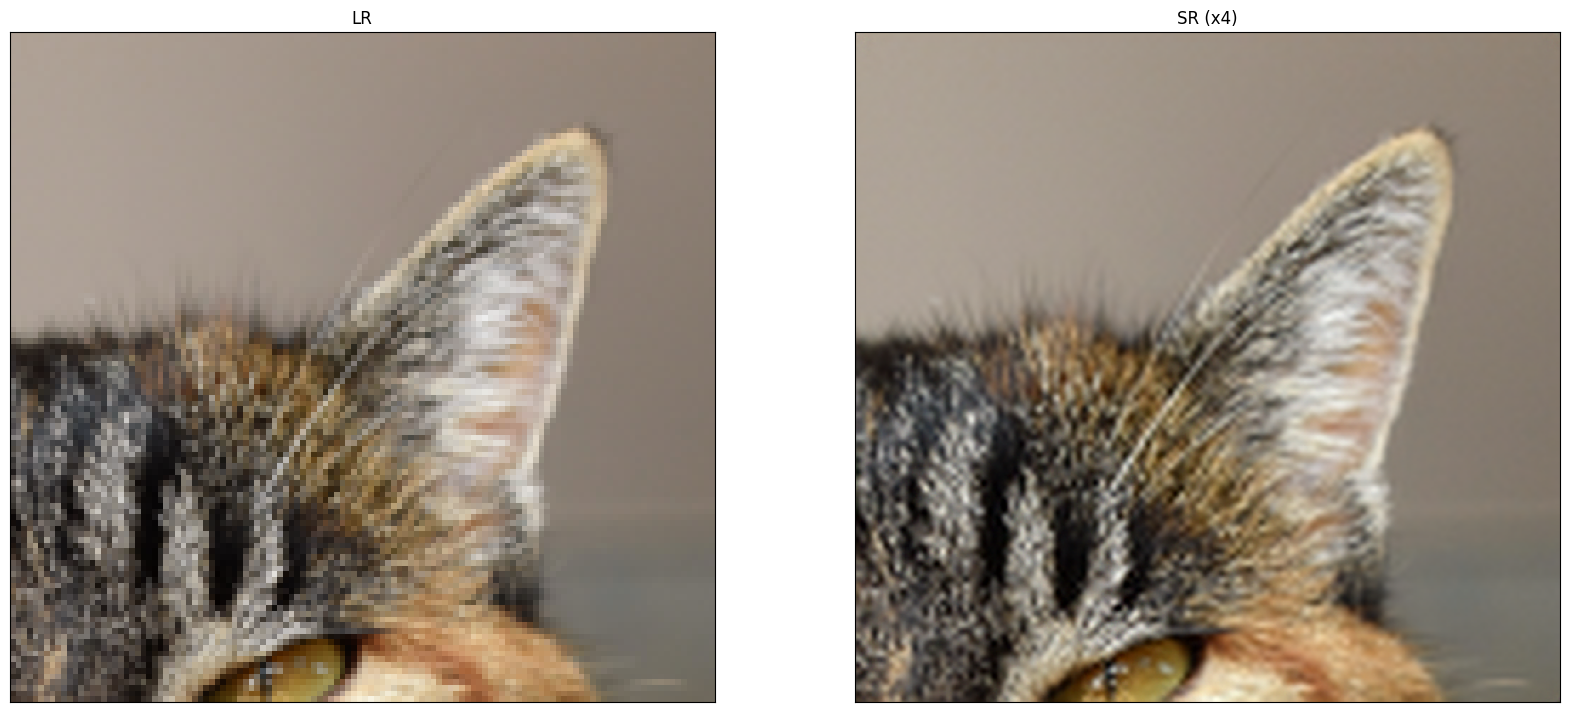

In [27]:
resolve_and_plot('demo/0869x4-crop.png')

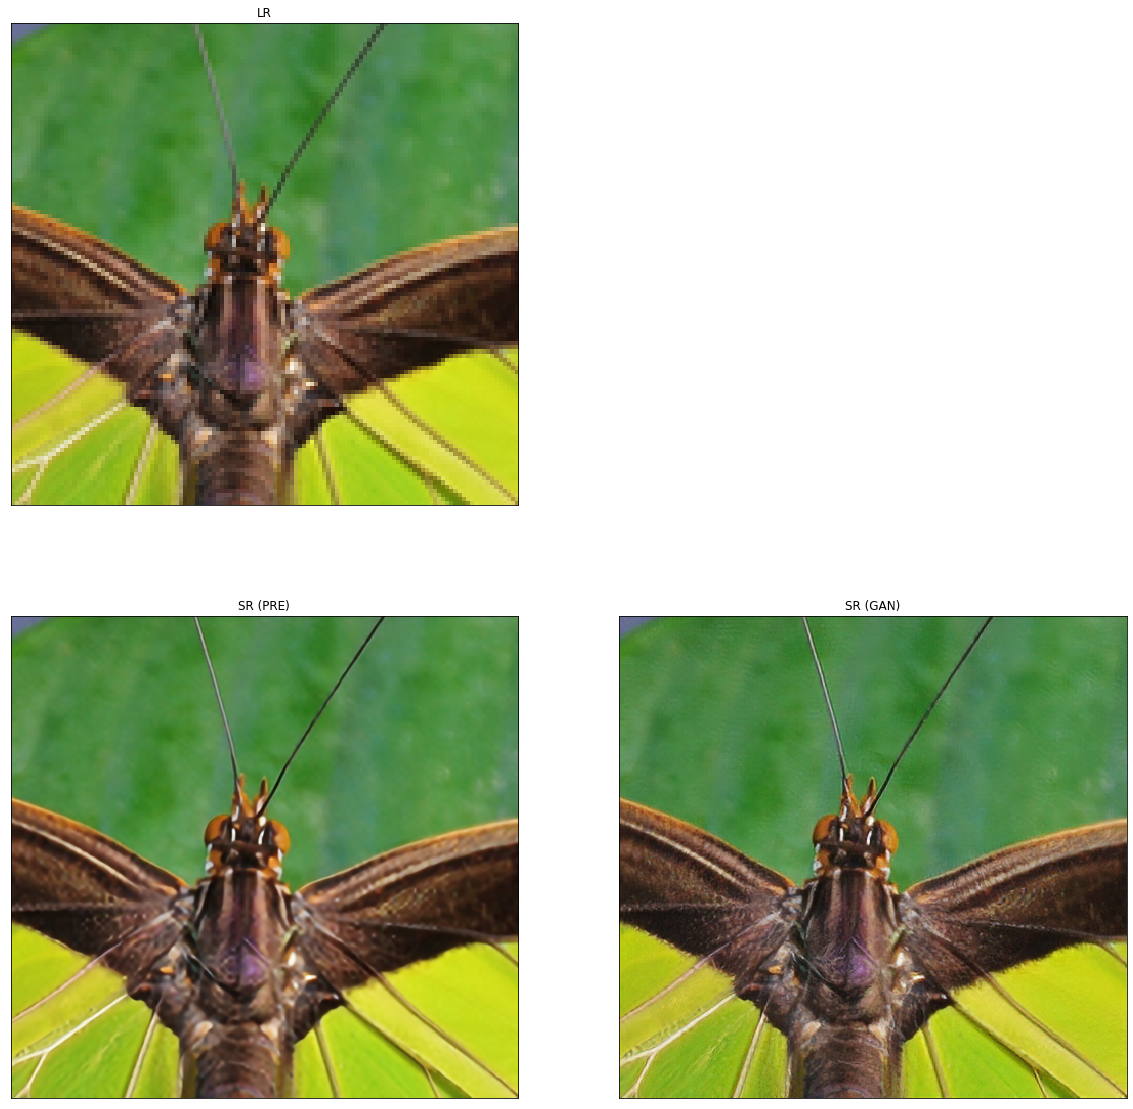

In [ ]:
resolve_and_plot('demo/0829x4-crop.png')

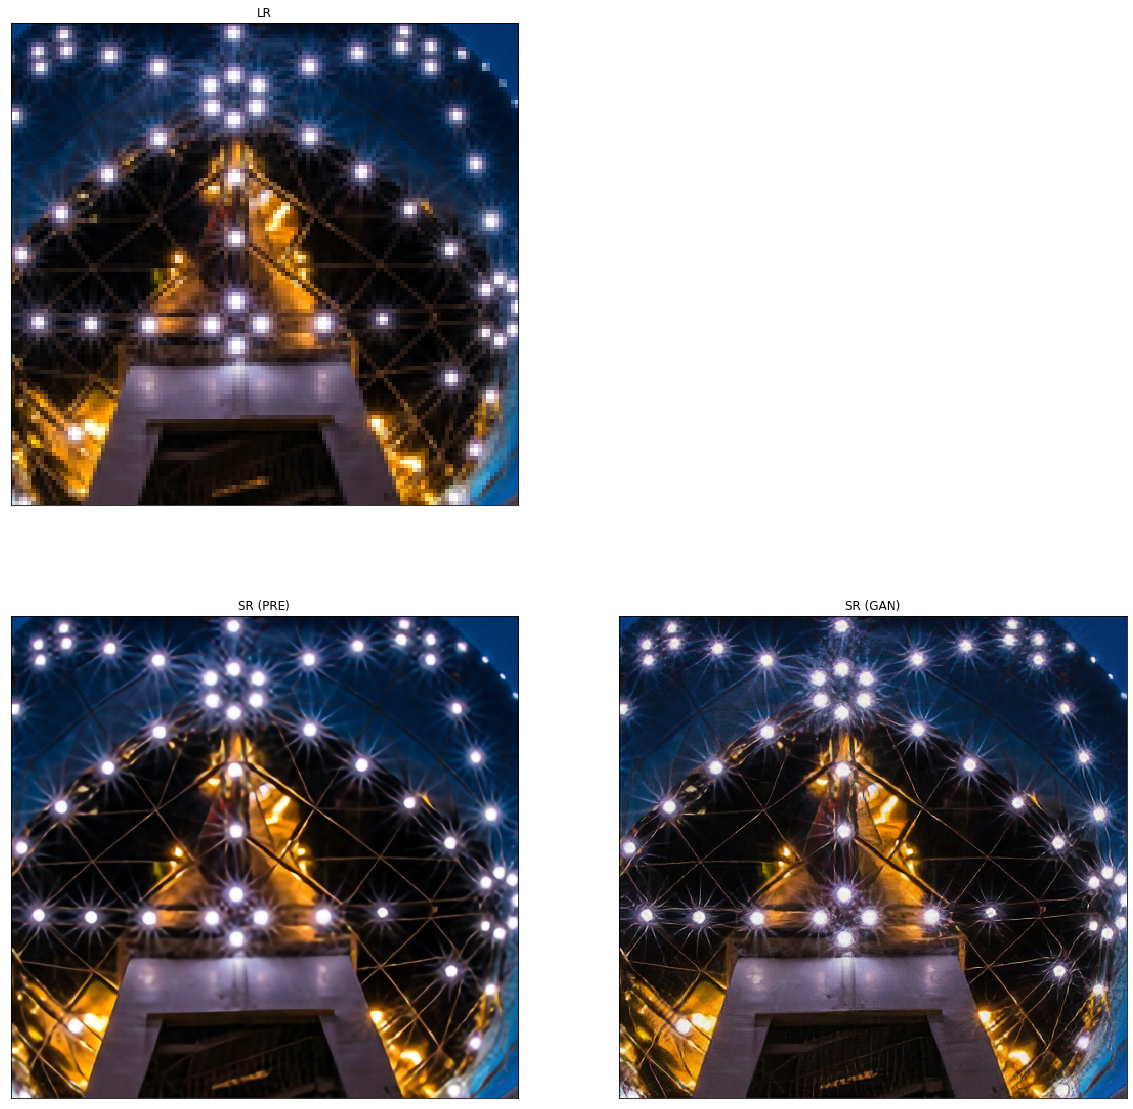

In [ ]:
resolve_and_plot('demo/0851x4-crop.png')